# Predicting Heart Attack in a patient
## Nikhil Kumar Singh
### This is my first project on GitHub. Any suggestion to improvise would be warmly welcomed.
### **1. Introduction:**
[**Coronary artery disease (CAD)**](https://en.wikipedia.org/wiki/Coronary_artery_disease), also known as coronary heart disease (CHD), or simply heart disease, usually involves a reduction in the blood flow due to blockage in the arteries of the heart. The heart disease are usually of the types stable angina, unstable angina, myocardial infarction, and sudden cardiac death. One of the most common symptom is shooting chest pain which may travel to the left shoulder or the arm. In many cases there are no symptoms of a heart disease but some usual symptoms mat include shortness of breath and emotional stress. Mostly the first sign of a heart disease in not clear until a heart attack.<br>
    Thus, having a machine learning model to predict the occurance of a heart disease based on various parameters which could detect early heart disease may prove to be quintessential in averting the heart attack.<br>

#### *1.1 Importing the Data and important libraries*

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
Data_heart=pd.read_csv(r'heart.csv')
Data_heart_copy=Data_heart.copy()
Data_heart_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attribute Description
**age**: age in years<br>
**sex**: (1 = male; 0 = female)<br>
**cp**: *chest pain type* (typical angina, atypical angina, non-angina, or asymptomatic angina)<br>
**trestbps**: *resting blood pressure* (in mm Hg on admission to the hospital)<br>
**chol**: *serum cholestoral* in mg/dl<br>
**fbs**: *Fasting blood sugar* (< 120 mg/dl or > 120 mg/dl) (1 = true; 0 = false)<br>
**restecg**: *resting electrocardiographic results* (normal, ST-T wave abnormality, or left ventricular hypertrophy)<br>
**thalach**: *Max. heart rate achieved during thalium stress test*<br>
**exang**: *Exercise induced angina* (1 = yes; 0 = no)<br>
**oldpeak**: *ST depression induced by exercise relative to rest*<br>
**slope**: *Slope of peak exercise ST segment* (0 = upsloping, 1 = flat, or 2 = downsloping)<br>
**ca**: *number of major vessels (0-3) colored by flourosopy* 4 = NA<br>
**thal**: *Thalium stress test result* 3 = normal; 6 = fixed defect; 7 = reversable defect 0 = NA<br>
**target**: *Heart disease status* 1 or 0 (0 = heart disease 1 = asymptomatic)<br>

#### *1.2. Investigating missing rows using missingno library*

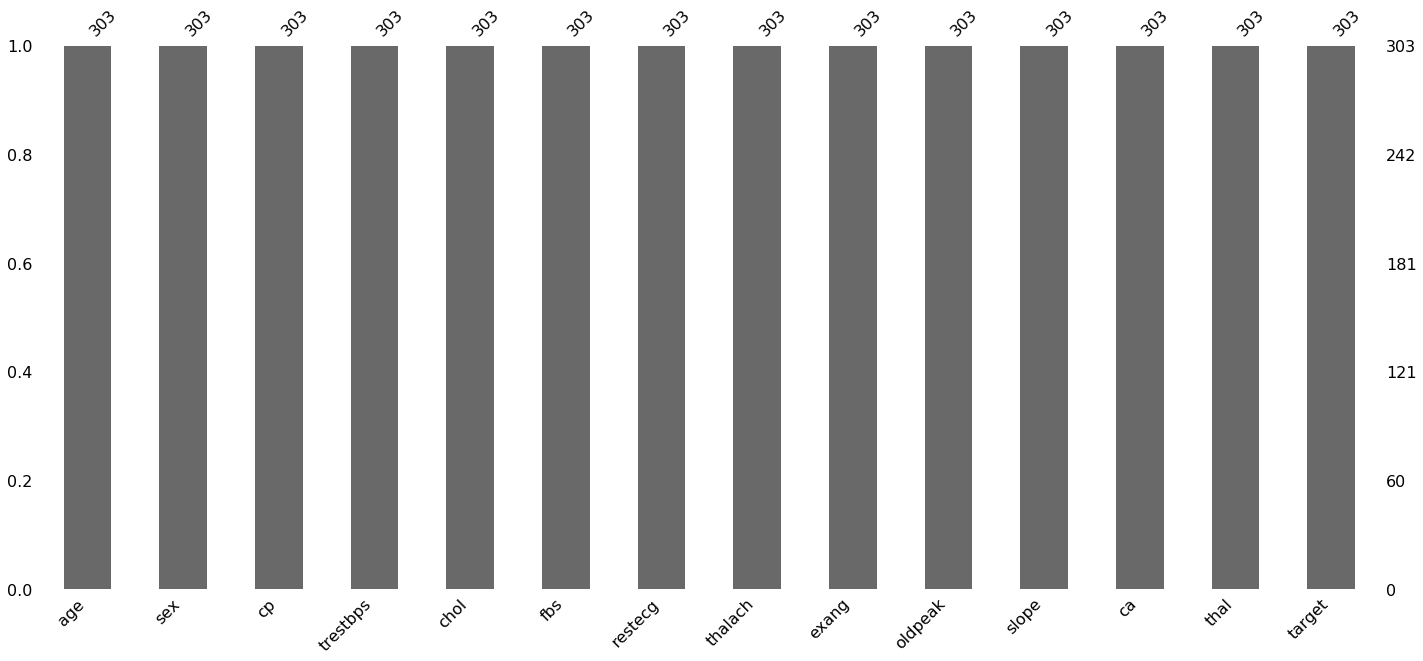

In [3]:
msno.bar(Data_heart)
plt.show()

#### **Fortunately there are no missing numbers and we can proceed ahead with the original data sine there is no need to clean the dataset**

### 2. Exploratory Data Analysis 

#### *2.1. Recoding categorical variables with the labels*

In [25]:
visuals={"sex":{1:"Male",0:"Female"},
         "cp":{0:"typical angina",1: "atypical angina" ,2: "non-anginal pain" ,3: "asymptomatic"},
         "fbs":{0:"<=120",1:">120"},
         "exang":{0:"no",1:"yes"},
         "restecg" :{0:"normal" ,1:"ST-T wave abnormality",2:"probable or definite left ventricular hypertrophy"},
         "target" :{ 0:"No Heart Disease",1 : "heart-disease"},
         "slope" :{2 : "upsloping",1 :"flat",0 : "downsloping"},
         "thal" :{ 1 : "fixed defect",0 : "normal",2 : "reversable defect",3:"NA"}
         
}
Data_heart_copy.replace(visuals,inplace=True)

#### *2.2 Understanding the distribution of numerical variables*

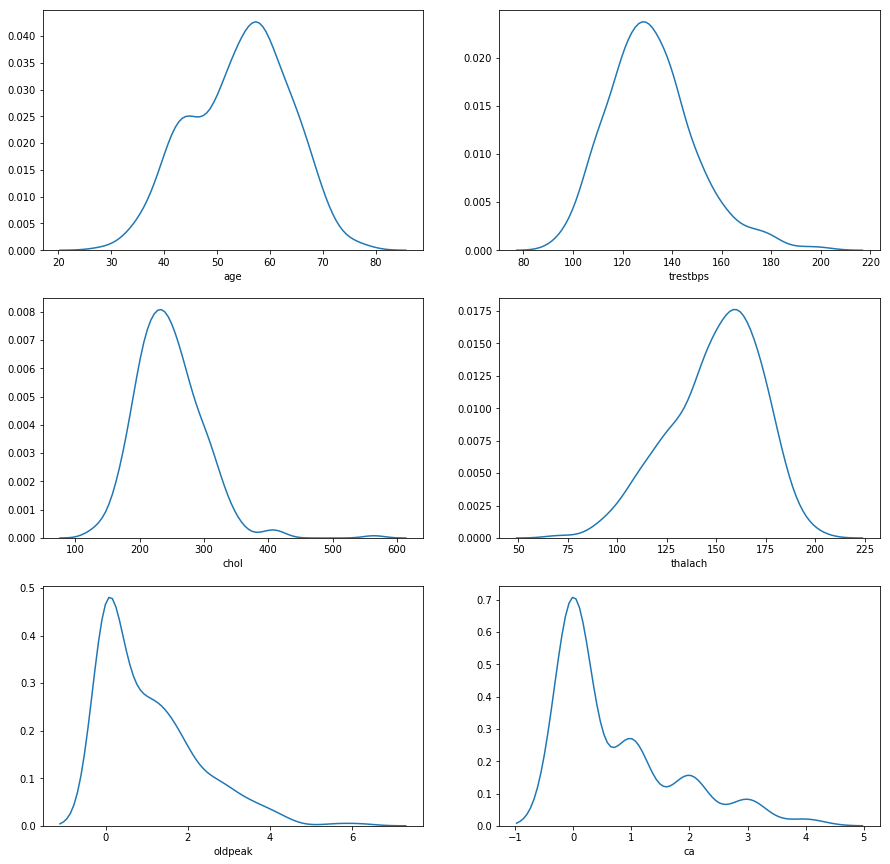

In [5]:
plt.figure(figsize=(15,15))
for i, col in enumerate(['age', 'trestbps', 'chol','thalach','oldpeak', 'ca']):
    plt.subplot(3,2,i+1)
    sns.distplot(Data_heart_copy[col],hist=False)
plt.show()

#### *2.3 Understanding the count of categorical variables*

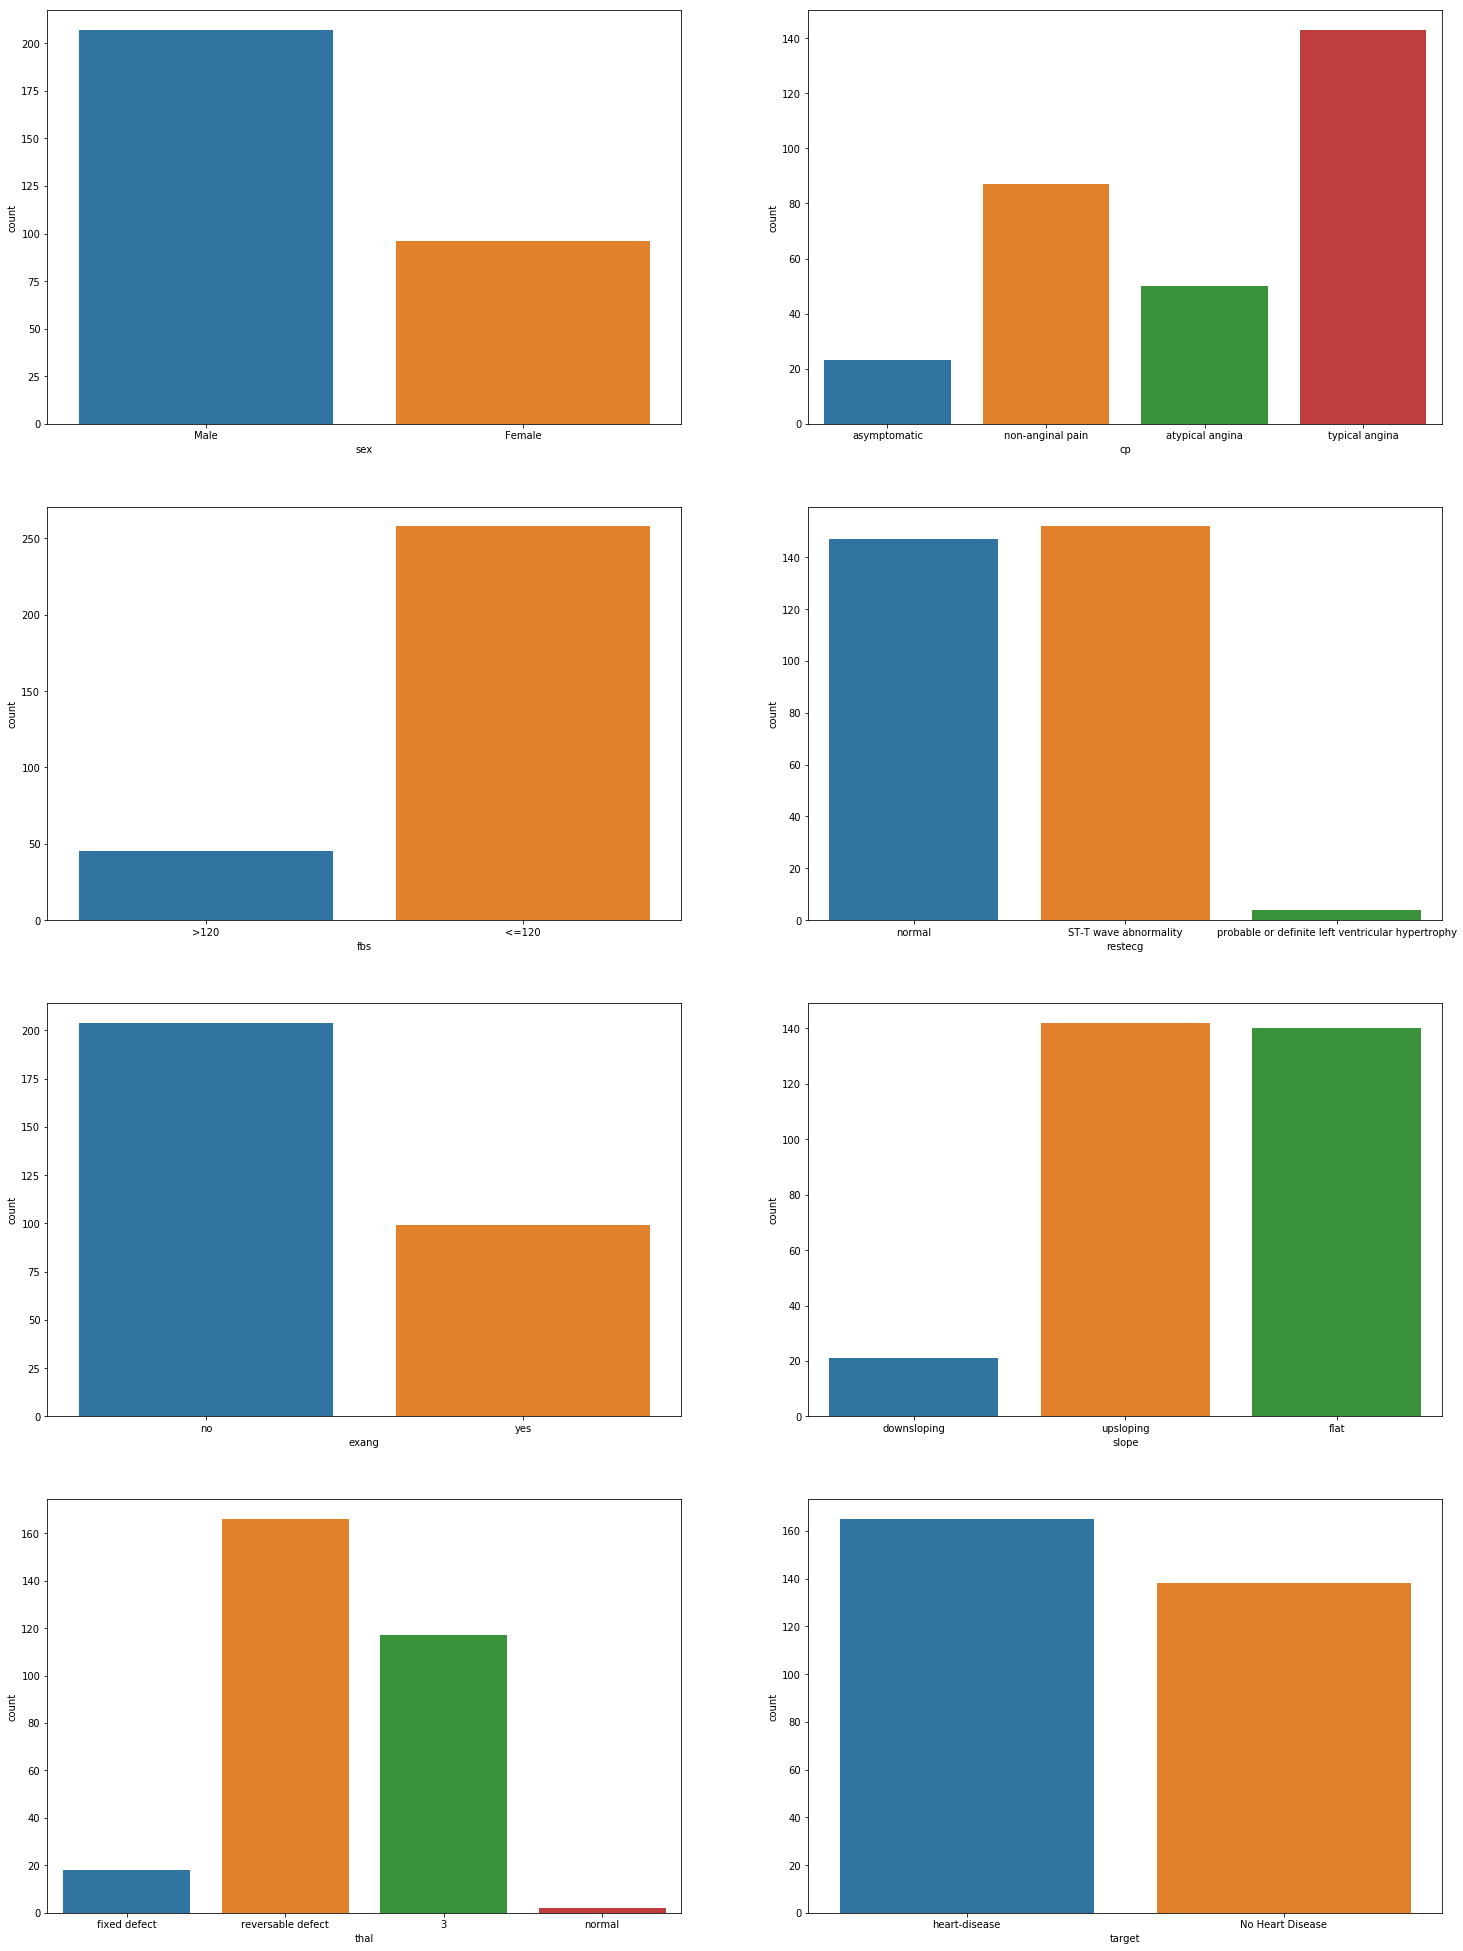

In [6]:
plt.figure(figsize=(25,35))
for i, col in enumerate(['sex', 'cp', 'fbs', 'restecg','exang','slope', 'thal', 'target']):
    plt.subplot(4,2,i+1)
    sns.countplot(x=col,data=Data_heart_copy)
plt.show()

#### *2.4 Age vs Heart Disease*

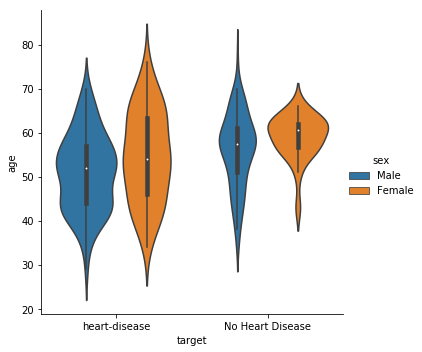

In [23]:
sns.catplot(x='target',y='age',hue='sex',data=Data_heart_copy,kind='violin')
plt.show()

##### As could be seen from the above graph, people in the range of [40 to 70](http://www.secondscount.org/treatments/treatments-detail-2/who-is-affected-by-cardiovascular-disease#.XxxuFJ4zbIU) suffers the most from the heart disease.

#### *2.5 Sex vs Heart Disease*

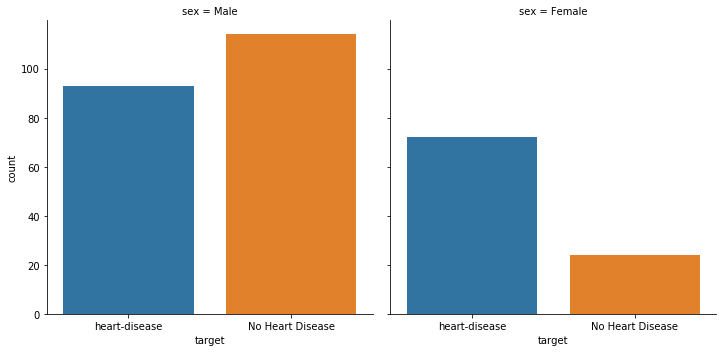

In [8]:
sns.catplot('target',col='sex',data=Data_heart_copy,kind='count')
plt.show()

##### **As can be seen from the graph, the propotion of males suffering from heart disease is more in males as compared to that in females.**

#### *2.6 Chest Pain vs Heart Disease*

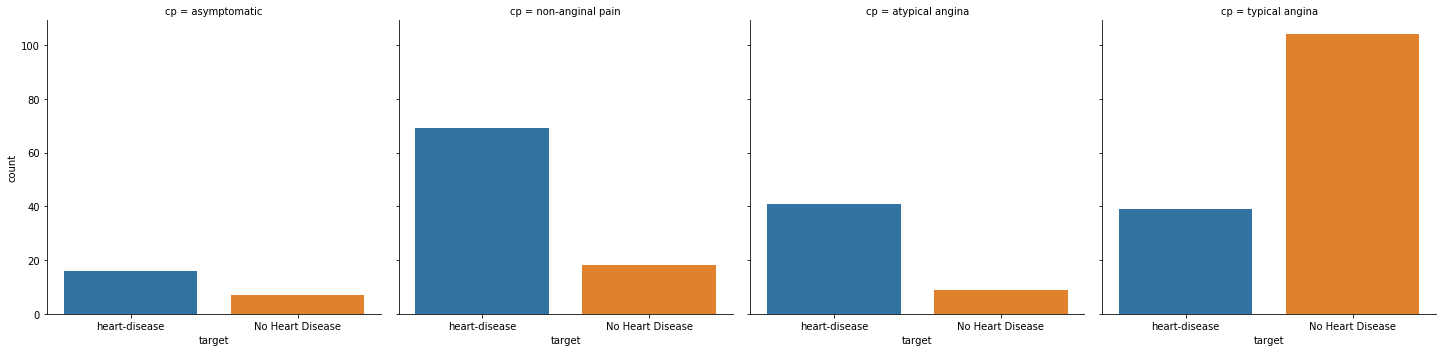

In [9]:
sns.catplot('target',col='cp',data=Data_heart_copy,kind='count')
plt.show()

##### **Most proportion of people suffering from heart disease shows [atypical anginal pain](https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/).<br> However, in most of the cases there is very subtle difference between atypical anginal pain and non-anginal pain.**

#### *2.7 Resting Ecg vs Heart Disease*

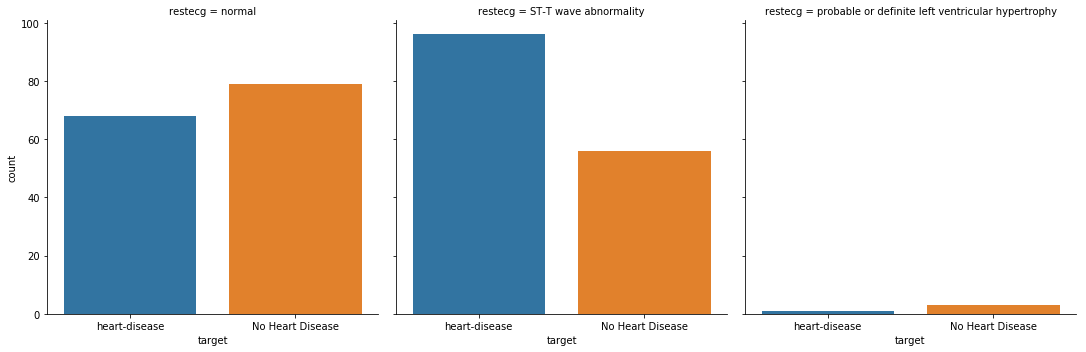

In [10]:
sns.catplot('target',col='restecg',data=Data_heart_copy,kind='count')
plt.show()

#### **People showing an abnormality in [ST-T wave](https://ecg.utah.edu/lesson/10) generally have a heart condition and this could play a major role in early detection of heart disease.**

#### *2.8 Thalium Test Result vs Heart Disease*

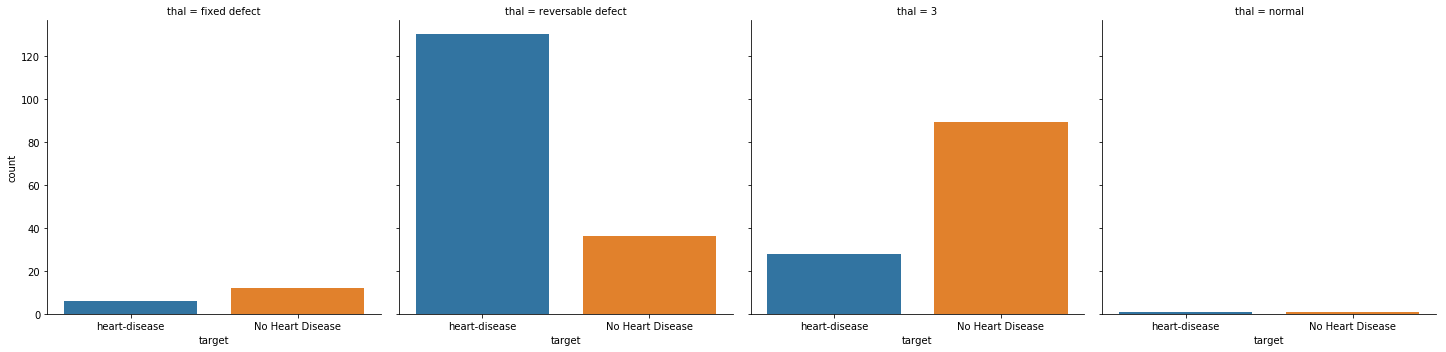

In [11]:
sns.catplot('target',col='thal',data=Data_heart_copy,kind='count')
plt.show()

##### **As can be seen from above people with defects in their arteries during [Thalium Test](https://www.healthline.com/health/thallium-stress-test) are more prone to heart disease and thus it could prove to be a good predictor for heart disease** 

#### *2.8 Max. heart rate achieved during thalium stress test vs Heart Disease*

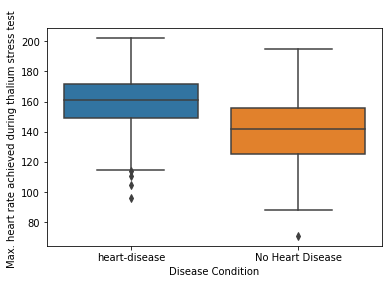

In [35]:
sns.boxplot(x="target",y="thalach",data=Data_heart_copy)
plt.ylabel("Max. heart rate achieved during thalium stress test ")
plt.xlabel("Disease Condition")
plt.show()
plt.show()

##### **It is intutive since people's heart with a disease has to do more work as compared to people who do not have heart-disease.**

#### *2.9 Cholestrol vs Heart Disease*

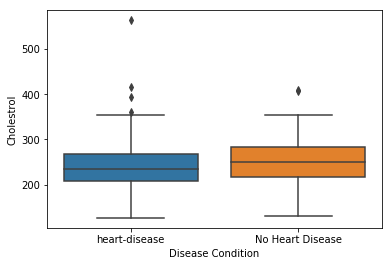

In [34]:
sns.boxplot(x="target",y="chol",data=Data_heart_copy)
plt.ylabel("Cholestrol")
plt.xlabel("Disease Condition")
plt.show()

#### *2.10 Resting Blood Pressure vs Heart Disease*

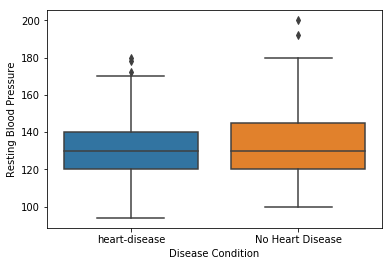

In [36]:
sns.boxplot(x="target",y="trestbps",data=Data_heart_copy)
plt.ylabel("Resting Blood Pressure")
plt.xlabel("Disease Condition")
plt.show()

## 3. Predictive Model Preparation(Classification Techniques)

##### **3.1 Dividing the dataset into Predictors and Target**

In [47]:
Predictors=Data_heart.drop('target',axis=1)
Target=Data_heart['target']

##### **3.2 Splitting the dataset in test and train. For this analysis, the model will be trained on 80% dataset and the rest 20% will be used for testing the dataset.**

In [49]:
from sklearn.model_selection import train_test_split
Predictors_train,Predictors_test,Target_train,Target_test=train_test_split(Predictors,Target,test_size=0.2,random_state=42)

In [50]:
print(Predictors_train.shape)
print(Predictors_test.shape)
print(Target_train.shape)
print(Target_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


#### 3.3 Logistic Regression

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy Score: 86.885246%


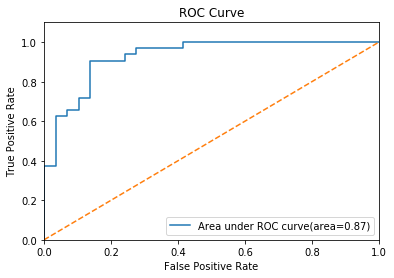

In [71]:
log_reg=LogisticRegression()
log_reg.fit(Predictors_train, Target_train)
Target_pred=log_reg.predict(Predictors_test)
print(confusion_matrix(Target_test,Target_pred))
print(classification_report(Target_test,Target_pred))
print("Accuracy Score: {:%}".format(accuracy_score(Target_test,Target_pred)))
roc_auc=roc_auc_score(Target_test,Target_pred)
fpr, tpr, thresholds = roc_curve(Target_test, log_reg.predict_proba(Predictors_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Area under ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### 3.4 KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range= range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Predictors_train,Target_train)
        Target_pred=knn.predict(Predictors_test)
        scores[k] = metrics.accuracy_score(Target_test,Target_pred)
        scores_list.append(metrics.accuracy_score(Target_test,Target_pred))

In [74]:
scores

{1: 0.6229508196721312,
 2: 0.639344262295082,
 3: 0.6557377049180327,
 4: 0.6721311475409836,
 5: 0.6885245901639344,
 6: 0.7213114754098361,
 7: 0.7049180327868853,
 8: 0.6885245901639344,
 9: 0.6885245901639344,
 10: 0.7049180327868853,
 11: 0.7540983606557377,
 12: 0.7377049180327869,
 13: 0.7377049180327869,
 14: 0.7377049180327869,
 15: 0.6885245901639344,
 16: 0.7213114754098361,
 17: 0.6885245901639344,
 18: 0.6885245901639344,
 19: 0.7049180327868853}

Text(0, 0.5, 'Testing Accuracy')

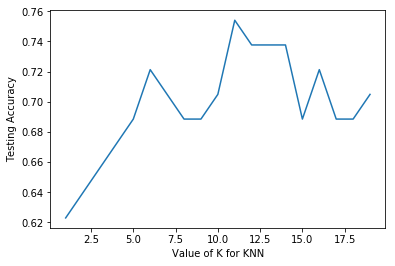

In [75]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

[[20  9]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

   micro avg       0.75      0.75      0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Accuracy Score: 75.409836%


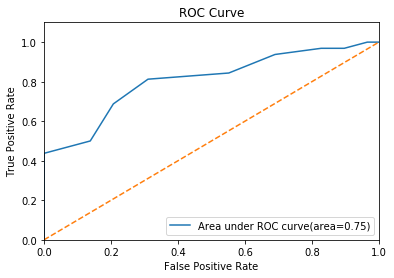

In [76]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(Predictors_train, Target_train)
Target_pred=knn.predict(Predictors_test)
print(confusion_matrix(Target_test,Target_pred))
print(classification_report(Target_test,Target_pred))
print("Accuracy Score: {:%}".format(accuracy_score(Target_test,Target_pred)))
roc_auc=roc_auc_score(Target_test,Target_pred)
fpr, tpr, thresholds = roc_curve(Target_test, knn.predict_proba(Predictors_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Area under ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### 3.4 Decision Tree

Model accuracy :  0.8360655737704918
[[26  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy Score: 83.606557%


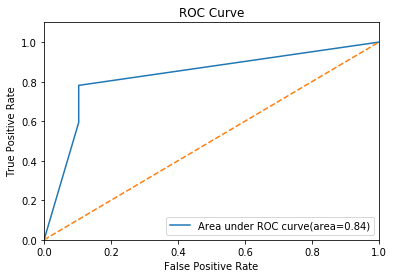

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_dt = DecisionTreeClassifier(max_depth=7).fit(Predictors_train, Target_train)
Target_pred = clf_dt.predict(Predictors_test)
score = accuracy_score(Target_test,Target_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(Target_test,Target_pred))  
print(classification_report(Target_test,Target_pred))  
print("Accuracy Score: {:%}".format(accuracy_score(Target_test,Target_pred)))
roc_auc=roc_auc_score(Target_test,Target_pred)
fpr, tpr, thresholds = roc_curve(Target_test, clf_dt.predict_proba(Predictors_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Area under ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion 
#### As can be seen from the above three models we get a high accuracy in the Logistic Regression model. Also, the sensitivity and the specificity were better in the logsitic Regression model than the other two.